In [97]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.testing as tm

In [98]:
#ML Packages
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [99]:
# Load Dataset
inputPath = "Churn_Modelling.csv"
df = pd.read_csv(inputPath, header=0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [103]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [104]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [105]:
#menampilkan data kososng
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [106]:
#mengecek data duplikat
df.duplicated().sum()

0

In [107]:
df.keys()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [108]:
df.values

array([[1, 15634602, 'Hargrave', ..., 1, 101348.88, 1],
       [2, 15647311, 'Hill', ..., 1, 112542.58, 0],
       [3, 15619304, 'Onio', ..., 0, 113931.57, 1],
       ...,
       [9998, 15584532, 'Liu', ..., 1, 42085.58, 1],
       [9999, 15682355, 'Sabbatini', ..., 0, 92888.52, 1],
       [10000, 15628319, 'Walker', ..., 0, 38190.78, 0]], dtype=object)

In [109]:
df.shape

(10000, 14)

In [110]:
#target distribusi
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

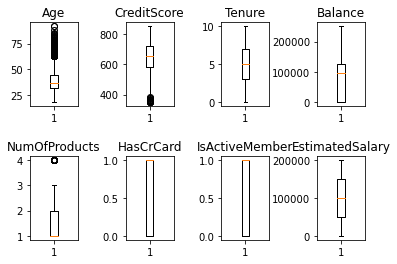

In [111]:
# Exploratory Analysis
# Box plot
fig, ((a,b,c,d),(e,f,g,h)) = plt.subplots(2,4)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1, hspace=0.6)

a.set_title("Age")
a.boxplot(df["Age"])
b.set_title("CreditScore")
b.boxplot(df["CreditScore"])
c.set_title("Tenure")
c.boxplot(df["Tenure"])
d.set_title("Balance")
d.boxplot(df["Balance"])
e.set_title("NumOfProducts")
e.boxplot(df["NumOfProducts"])
f.set_title("HasCrCard")
f.boxplot(df["HasCrCard"])
g.set_title("IsActiveMember")
g.boxplot(df["IsActiveMember"])
h.set_title("EstimatedSalary")
h.boxplot(df["EstimatedSalary"])
plt.show()


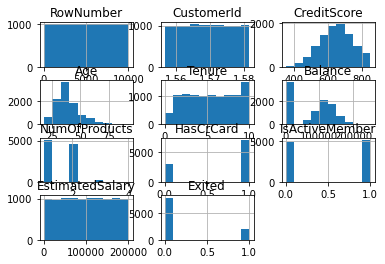

In [112]:

#histogram 
df.hist()
plt.show()
     

<AxesSubplot:>

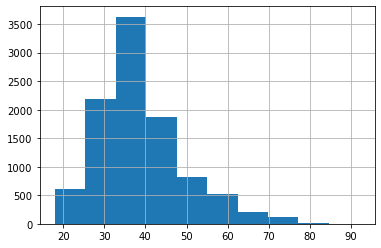

In [113]:
df['Age'].hist()

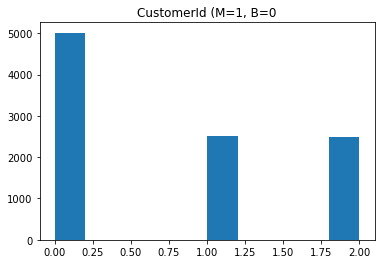

In [130]:
df.describe()

plt.hist(df['Geography']) 
plt.title('CustomerId (M=1, B=0') 
plt.show()

In [131]:
print(df.groupby('Geography').size())

Geography
0.0    5014
1.0    2509
2.0    2477
dtype: int64


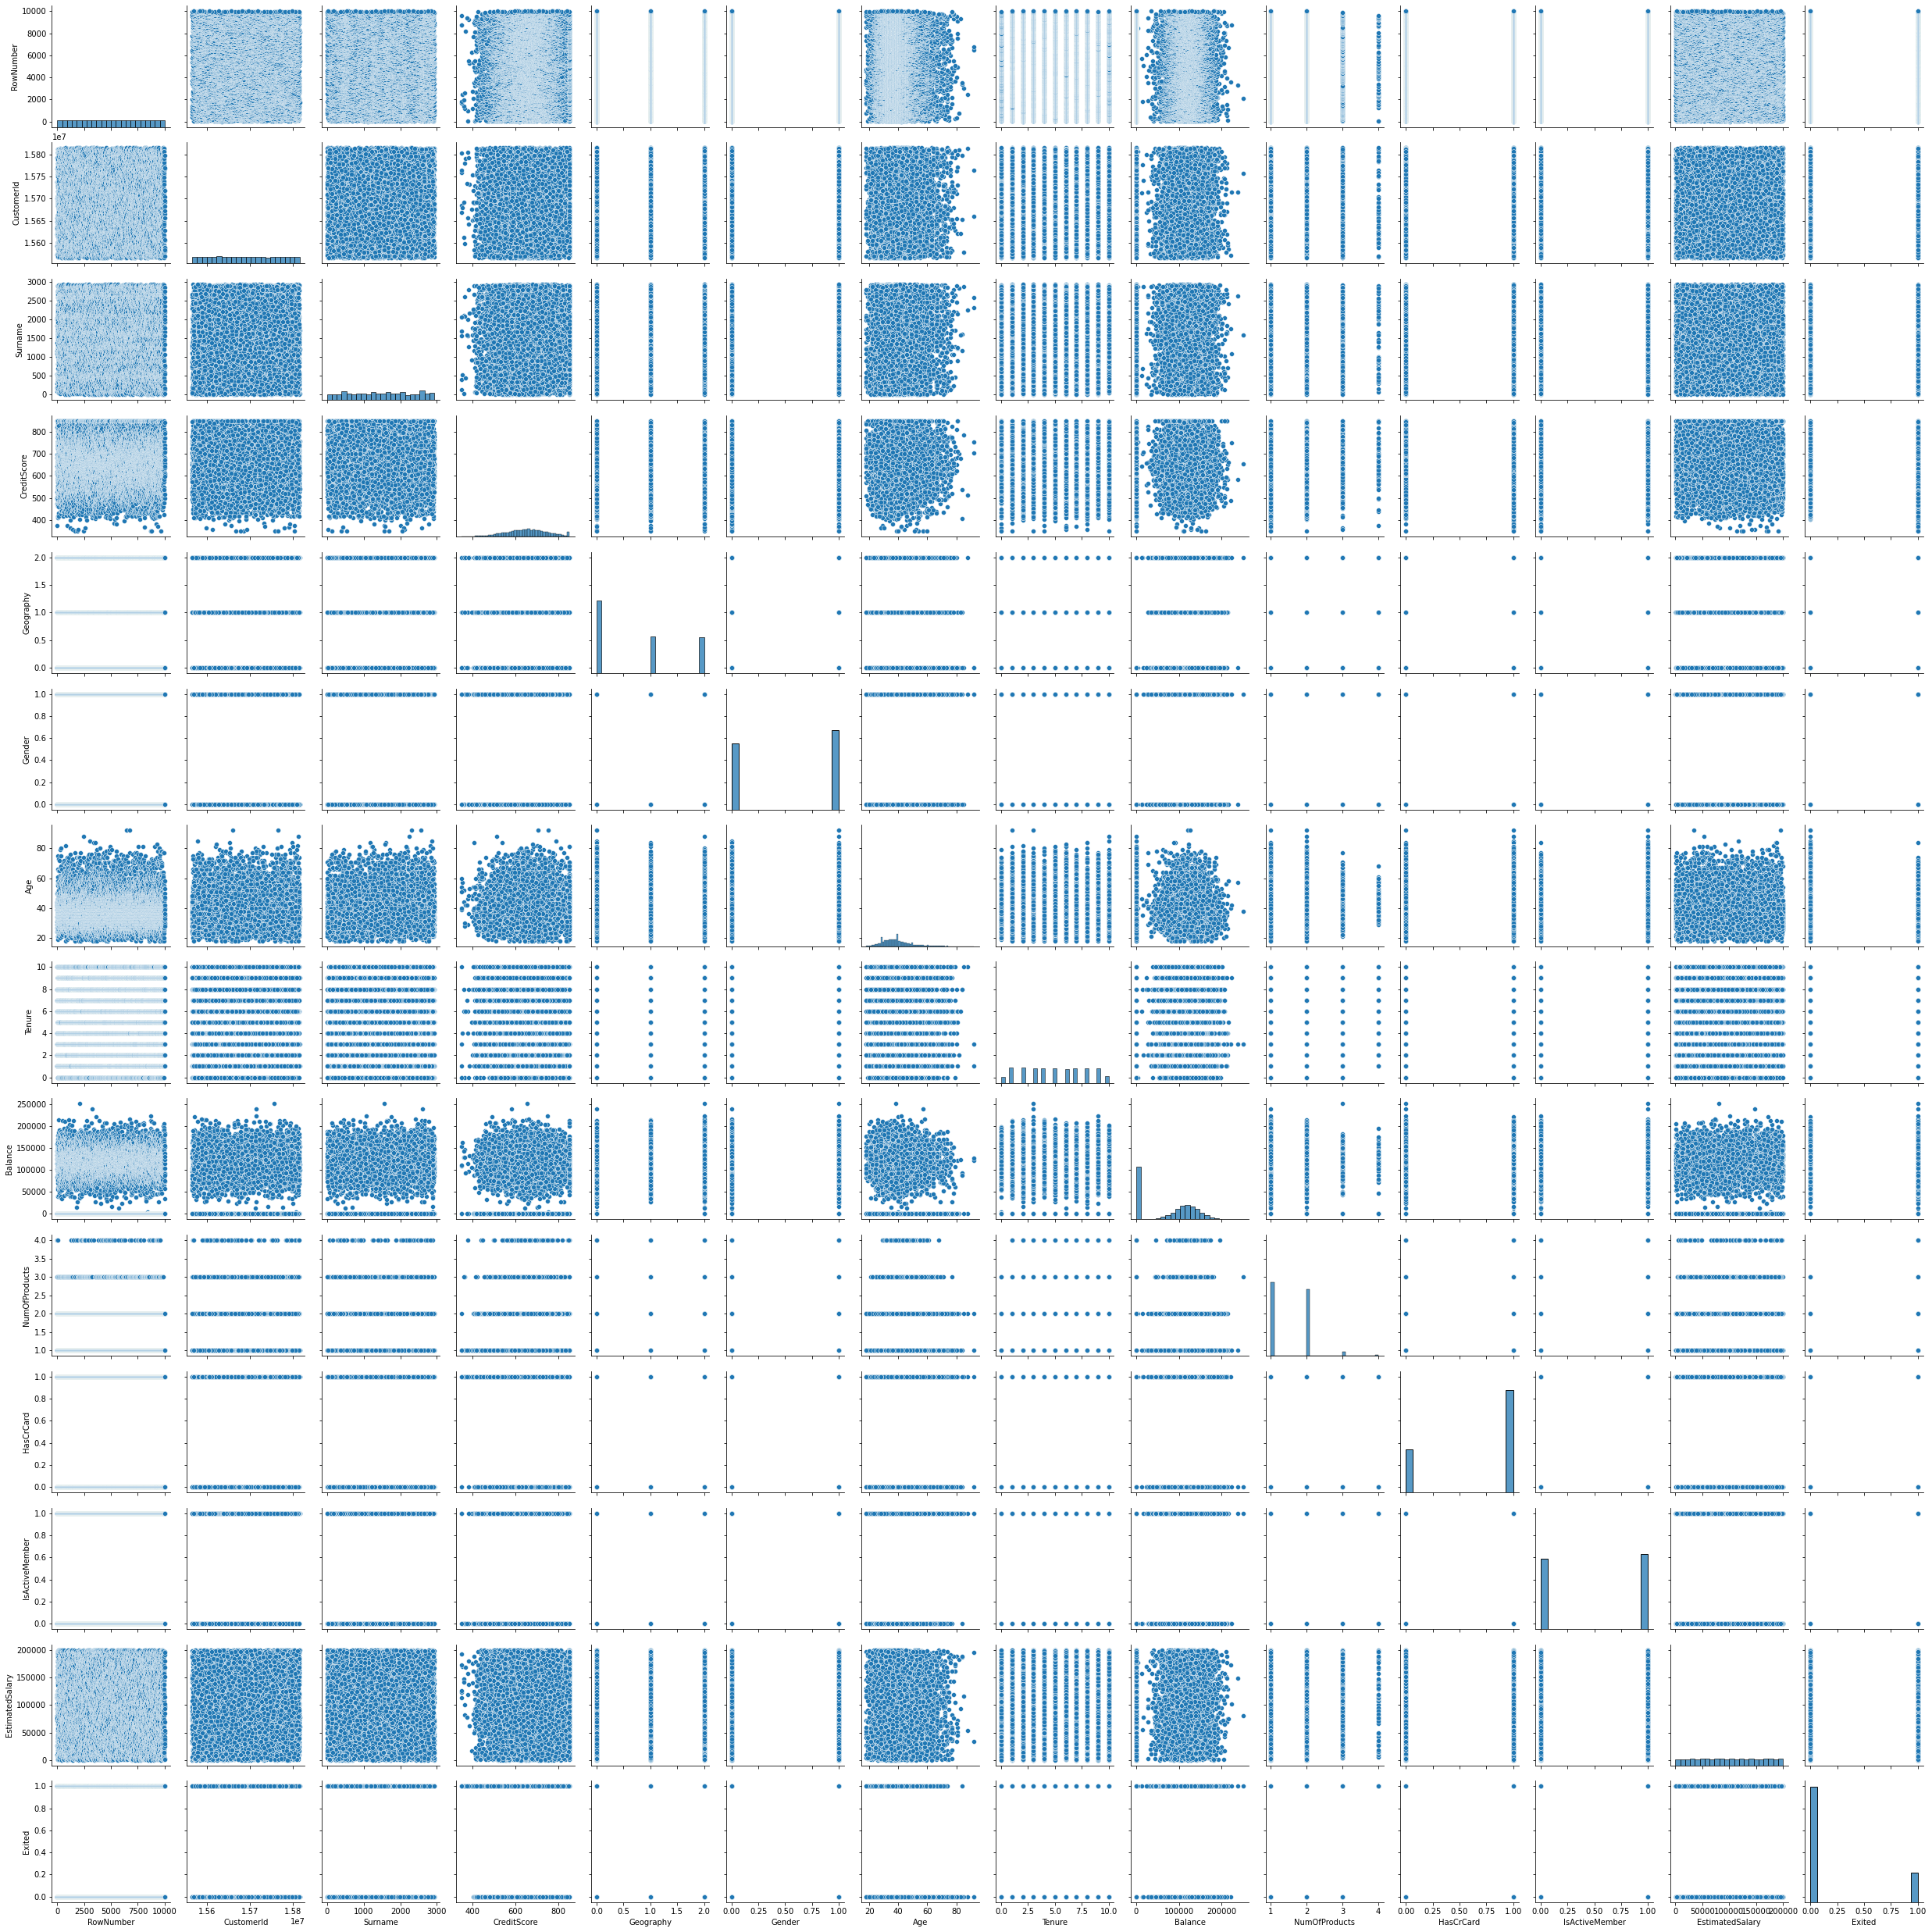

In [126]:
#multivariate plot
sns.pairplot(df)

In [114]:

#Ubah data dengan tipe data object menjadi numerical dengan menggunakan Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
#backup dataset
df = df.copy()
#encode categorical data 
ordnl_enc = OrdinalEncoder()
df[['Gender']] = ordnl_enc.fit_transform(df[['Gender']])
df[['Surname']] = ordnl_enc.fit_transform(df[['Surname']])
df[['Geography']] = ordnl_enc.fit_transform(df[['Geography']])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  float64
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  float64
 5   Gender           10000 non-null  float64
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 1.1 MB


In [116]:
array = df.values
x = array[:,0:13] 
y = array[:,-1]
y

array([1., 0., 1., ..., 1., 1., 0.])

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=3)

x_train

array([[5.2920000e+03, 1.5575510e+07, 1.8030000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 1.5366288e+05],
       [8.7720000e+03, 1.5621093e+07, 2.5870000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 4.8226760e+04],
       [3.6000000e+01, 1.5794171e+07, 1.5870000e+03, ..., 1.0000000e+00,
        0.0000000e+00, 2.7822990e+04],
       ...,
       [9.8600000e+03, 1.5615430e+07, 1.4000000e+01, ..., 1.0000000e+00,
        1.0000000e+00, 1.8412510e+05],
       [1.6890000e+03, 1.5804610e+07, 2.7050000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 1.6060706e+05],
       [5.9950000e+03, 1.5746065e+07, 1.5730000e+03, ..., 1.0000000e+00,
        1.0000000e+00, 2.4799470e+04]])

In [118]:
y_train

array([0., 0., 1., ..., 1., 0., 0.])

In [119]:
print("Banyak data latih setelah dilakukan Train-Validation Split: ", len(x_train))
print("Banyak data uji setelah dilakukan Train-Validation Split: ", len(x_test))

Banyak data latih setelah dilakukan Train-Validation Split:  8000
Banyak data uji setelah dilakukan Train-Validation Split:  2000


In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
model = DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [121]:
y_predict = model.predict(x_test)
y_predict

array([0., 0., 1., ..., 0., 0., 0.])

In [122]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[1383,  222],
       [ 207,  188]], dtype=int64)

<AxesSubplot:>

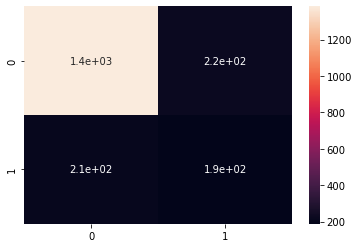

In [123]:

sns.heatmap(cm, annot=True)

In [124]:

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87      1605
         1.0       0.46      0.48      0.47       395

    accuracy                           0.79      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.79      0.79      0.79      2000



In [125]:
print("accuracy : ", model.score(x_test,y_test))

accuracy :  0.7855


In [128]:
import pickle
Pkl_Filename = "tree_model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [129]:
#load back
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)
Pickled_LR_Model

DecisionTreeClassifier(random_state=0)